<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">Deadline: 2019-11-03 23:59:59</font></h2>
<h3 align="center"><font size="5"> Total marks: 7.0</font></h3>

### Your information:
- Fullname:
- Date of birth:
- Place of birth:
- Email:
- Mobile phone:

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Logistic Regression Algorithm** to predict: "Whether a loan is paid off on in collection" by accuracy evaluation methods.

Lets first load required libraries:

In [104]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

### Tips: Step by step like Chapter2_Ex1_Housing prices 

### Load Data From CSV File  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [3]:
data=pd.read_csv("loan_train.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
data.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [9]:
data.shape

(346, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [12]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [13]:
data['due_date'] = pd.to_datetime(data['due_date'])
data['effective_date'] = pd.to_datetime(data['effective_date'])
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


### Convert 'due_date', 'effective_date' to date time object 

In [14]:
data['due_date'] = pd.to_datetime(data['due_date'])
data['effective_date'] = pd.to_datetime(data['effective_date'])
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization

How many sample of each class is in our data set?

In [18]:
data["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**xxx** people have paid off the loan on time while **xxx** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
img1 = np.array(Image.open('Principal_Male_Female.jpg'))

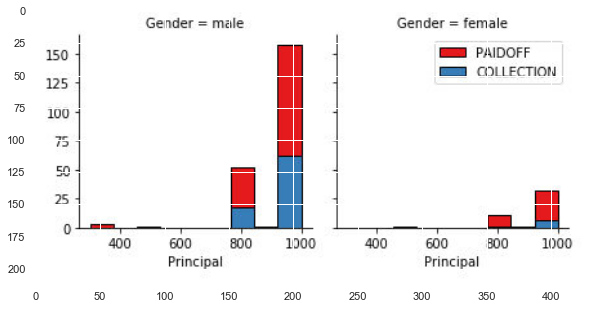

In [21]:
plt.figure(figsize=(10,5))
plt.imshow(img1, interpolation='bilinear')
plt.show()

In [22]:
img2 = np.array(Image.open('Age_Male_Female.jpg'))

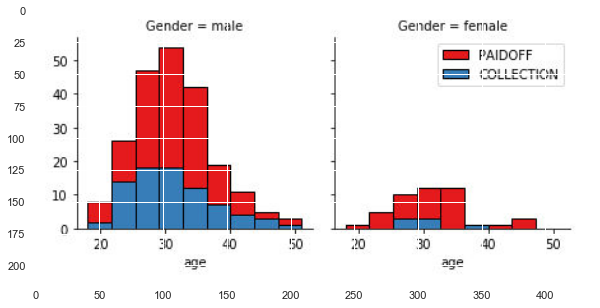

In [23]:
plt.figure(figsize=(10,5))
plt.imshow(img2, interpolation='bilinear')
plt.show()

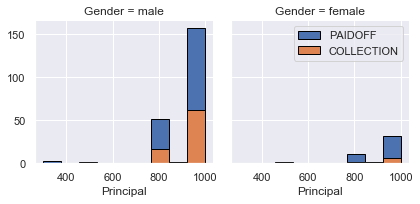

In [33]:
b1=np.linspace(data["Principal"].min(),data["Principal"].max(),10)
tan1=sb.FacetGrid(data,col="Gender",hue="loan_status",col_wrap=2)  
tan1.map(plt.hist,"Principal",bins=b1,edgecolor="black")
tan1.axes[-1].legend()
plt.show()

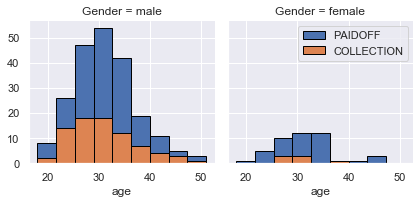

In [36]:
b2=np.linspace(data['age'].min(),data['age'].max(),10)
tan2=sb.FacetGrid(data,col="Gender",hue="loan_status",col_wrap=2)  
tan2.map(plt.hist,"age",bins=b2, edgecolor="black")
tan2.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [37]:
data["dayofweek"]=data['effective_date'].dt.dayofweek

Lets plot some columns to underestand data better:

In [43]:
img3 = np.array(Image.open('day_of_week.jpg'))

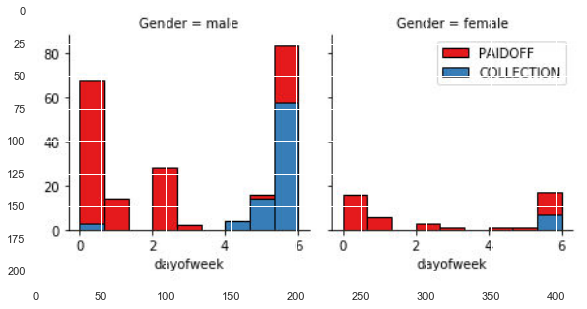

In [44]:
plt.figure(figsize=(10,5))
plt.imshow(img3, interpolation='bilinear')
plt.show()

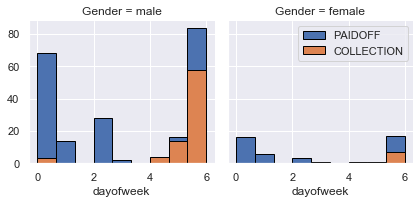

In [48]:
b3=np.linspace(data.dayofweek.min(),data.dayofweek.max(),10)
tan3=sb.FacetGrid(data,col="Gender",hue="loan_status",col_wrap=2)
tan3.map(plt.hist,"dayofweek", bins=b3,edgecolor="black")
tan3.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [49]:
data['weekend'] = data['dayofweek'].map(lambda x:1 if x>3 else 0)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [57]:
(data.groupby(['Gender'])['loan_status'].value_counts())/(data.groupby(['Gender']).size())*100

Gender  loan_status
female  PAIDOFF        86.538462
        COLLECTION     13.461538
male    PAIDOFF        73.129252
        COLLECTION     26.870748
dtype: float64

### Nữ là 86.5% Nam là 73.1%

**xxx** % of female pay there loans while only **xxx** % of males pay there loan

Lets convert male to 0 and female to 1:


In [58]:
data['Gender'] = data['Gender'].map(lambda x:0 if x=="male" else 1)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [63]:
data.groupby(['education']).loan_status.value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

#### Feature befor One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [66]:
data[["Principal","terms","age","Gender","education"]].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [68]:
Feature=data[["Principal","terms","age","Gender","weekend"]]

In [69]:
education=data["education"]
education=pd.get_dummies(education,columns=["euducation"])

In [71]:
education.head()

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [72]:
Feature=pd.concat([Feature,education],axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


### Feature selection

Lets defind feature sets, X:
- X is input, X = Feature

In [78]:
X=Feature

What are our lables?
- y is output, y = 'loan_status' column

In [79]:
y=data['loan_status']

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )
- Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [82]:
from sklearn import preprocessing

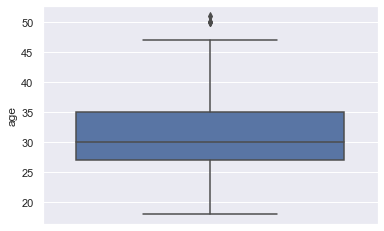

In [86]:
sb.boxplot(y=X["age"])

có outlier nên em sẽ sử dụng Robust scaler cho biến age

In [87]:
scaler = preprocessing.RobustScaler()
df_scaler=scaler.fit_transform(pd.DataFrame(X["age"]))

In [88]:
df_scaler=pd.DataFrame(df_scaler,columns=["age"])

In [91]:
Feature["terms"].unique()

array([30, 15,  7], dtype=int64)

In [93]:
Feature["Principal"].unique()

array([1000,  800,  300,  900,  500], dtype=int64)

terms và Principal là biến phân loại có thứ bậc nên em dùng Label Encoder

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
label_encoder = LabelEncoder()
X['terms_new'] = label_encoder.fit_transform(X['terms'])
X['Principal_new'] = label_encoder.fit_transform(X['Principal'])
X

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college,terms_new,Principal_new
0,1000,30,45,0,0,0,1,0,0,2,4
1,1000,30,33,1,0,1,0,0,0,2,4
2,1000,15,27,0,0,0,0,0,1,1,4
3,1000,30,28,1,1,0,0,0,1,2,4
4,1000,30,29,0,1,0,0,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0,0,1,2
342,1000,30,25,0,1,0,1,0,0,2,4
343,800,15,39,0,0,0,0,0,1,1,2
344,1000,30,28,0,0,0,0,0,1,2,4


In [101]:
X.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'Master or Above', 'college', 'terms_new',
       'Principal_new'],
      dtype='object')

In [102]:
X=X[["Principal_new","terms_new","Gender","weekend","Bechalor","High School or Below","Master or Above","college"]]

In [103]:
X=pd.concat([X,df_scaler],axis=1)
X.head()

,Principal_new,terms_new,Gender,weekend,Bechalor,High School or Below,Master or Above,college,age
0,4,2,0,0,0,1,0,0,1.875
1,4,2,1,0,1,0,0,0,0.375
2,4,1,0,0,0,0,0,1,-0.375
3,4,2,1,1,0,0,0,1,-0.250
4,4,2,0,1,0,0,0,1,-0.125


### Dữ liệu sau khi được scale và label encoder, sẵn sàng để làm việc

# Logistic Regression

In [107]:
data=pd.read_csv("loan_train.csv")

In [111]:
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


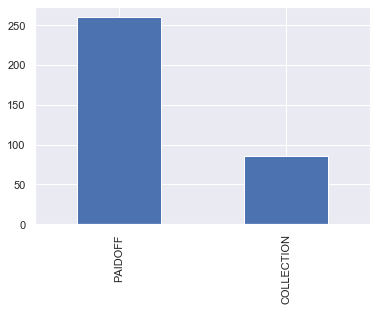

In [113]:
data["loan_status"].value_counts().plot.bar()

In [114]:
data["loan_status"]=data["loan_status"].map(lambda x: 0 if x=="PAIDOFF" else 1)

In [115]:
education={'High School or Below':1,'college':2,'Bechalor':3,'Master or Above':4}
data["education"] = [education[item] for item in data["education"]]

In [124]:
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,9/8/2016,10/7/2016,45,1,male
1,2,2,0,1000,30,9/8/2016,10/7/2016,33,3,female
2,3,3,0,1000,15,9/8/2016,9/22/2016,27,2,male
3,4,4,0,1000,30,9/9/2016,10/8/2016,28,2,female
4,6,6,0,1000,30,9/9/2016,10/8/2016,29,2,male


In [126]:
X.columns

Index(['Principal_new', 'terms_new', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'Master or Above', 'college', 'age'],
      dtype='object')

In [127]:
data_final=pd.concat([data[["education","loan_status"]],X[["Principal_new","terms_new","Gender","age","weekend"]]],axis=1)
data_final

,education,loan_status,Principal_new,terms_new,Gender,age,weekend
0,1,0,4,2,0,1.875,0
1,3,0,4,2,1,0.375,0
2,2,0,4,1,0,-0.375,0
3,2,0,4,2,1,-0.250,1
4,2,0,4,2,0,-0.125,1
...,...,...,...,...,...,...,...
341,1,1,2,1,0,0.250,1
342,1,1,4,2,0,-0.625,1
343,2,1,2,1,0,1.125,0
344,2,1,4,2,0,-0.250,0


In [131]:
data_final.columns

Index(['education', 'loan_status', 'Principal_new', 'terms_new', 'Gender',
       'age', 'weekend'],
      dtype='object')

In [132]:
X_train=data_final.drop(columns=["loan_status"])
y_train=data_final["loan_status"]

In [136]:
X_train.head()

,education,Principal_new,terms_new,Gender,age,weekend
0,1,4,2,0,1.875,0
1,3,4,2,1,0.375,0
2,2,4,1,0,-0.375,0
3,2,4,2,1,-0.250,1
4,2,4,2,0,-0.125,1


In [139]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

# Xử lý dữ liệu phần test set:

In [149]:
datatest=pd.read_csv("loan_test.csv")
datatest['due_date'] = pd.to_datetime(datatest['due_date'])
datatest['effective_date'] = pd.to_datetime(datatest['effective_date'])
datatest["dayofweek"]=datatest['effective_date'].dt.dayofweek
datatest['weekend'] = datatest['dayofweek'].map(lambda x:1 if x>3 else 0)
datatest['Gender'] = datatest['Gender'].map(lambda x:0 if x=="male" else 1)
label_encoder = LabelEncoder()
datatest['terms_new'] = label_encoder.fit_transform(datatest['terms'])
datatest['Principal_new'] = label_encoder.fit_transform(datatest['Principal'])
education={'High School or Below':1,'college':2,'Bechalor':3,'Master or Above':4}
datatest["education"] = [education[item] for item in datatest["education"]]
datatest["loan_status"]=datatest["loan_status"].map(lambda x: 0 if x=="PAIDOFF" else 1)
datatest=datatest[["Principal_new","terms_new","dayofweek","age","education","Gender","weekend","loan_status"]]
scaler = preprocessing.RobustScaler()
age_test=scaler.fit_transform(pd.DataFrame(datatest["age"]))
datatest["age"]=pd.DataFrame(age_test,columns=["age"])
X_test=datatest[["education","Principal_new","terms_new","Gender","age","weekend"]]
y_test=datatest["loan_status"]

In [151]:
X_test.head()

,education,Principal_new,terms_new,Gender,age,weekend
0,3,3,2,1,2.4375,0
1,4,0,0,0,0.5625,1
2,1,3,2,1,1.5625,1
3,2,3,2,0,-0.5625,1
4,3,2,1,0,-0.1875,1


In [152]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
Y_pred_train=lr.predict(X_train)
Y_pred_test=lr.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score
print('Tỉ lệ dự đoán đúng trên train set: ', accuracy_score(y_train, Y_pred_train) * 100, "%")

Tỉ lệ dự đoán đúng trên train set:  75.14450867052022 %


In [155]:
print('Tỉ lệ dự đoán đúng trên tập test set: ', accuracy_score(y_test, Y_pred_test) * 100, "%")

Tỉ lệ dự đoán đúng trên tập test set:  74.07407407407408 %


In [156]:
from sklearn.metrics import confusion_matrix

In [157]:
conf_ma_test = confusion_matrix(y_true=y_test, y_pred=Y_pred_test)
print('Confusion matrix của tập test set:\n', conf_ma_test.T)

Confusion matrix của tập test set:
 [[40 14]
 [ 0  0]]


In [159]:
conf_ma_train = confusion_matrix(y_true=y_train, y_pred=Y_pred_train)
print('Confusion matrix:\n', conf_ma_train.T)

Confusion matrix:
 [[260  86]
 [  0   0]]


In [161]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       260
           1       0.00      0.00      0.00        86

    accuracy                           0.75       346
   macro avg       0.38      0.50      0.43       346
weighted avg       0.56      0.75      0.64       346



Có thể thấy F1-Score của Paidoff khá cao là 0.86, trong khi của collection là 0.00 trên training set

In [164]:
print(classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        40
           1       0.00      0.00      0.00        14

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



In [218]:
from imblearn.over_sampling import SMOTE

In [219]:
sm=SMOTE()

In [220]:
X_resample,y_resample =sm.fit_sample(X_train, y_train)

In [221]:
model_r=LogisticRegression()
model_r.fit(X_resample, y_resample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [222]:
Y_pred_train_r=model_r.predict(X_resample)
Y_pred_test_r=model_r.predict(X_test)

In [224]:
print('Tỉ lệ dự đoán chính xác trên tập training set: ', accuracy_score(y_resample, Y_pred_train_r) * 100, "%")

Tỉ lệ dự đoán chính xác trên tập training set:  75.57692307692308 %


In [226]:
print('Tỉ lệ dự đoán chính xác trên tập training set: ', accuracy_score(y_test, Y_pred_test_r) * 100, "%")

Tỉ lệ dự đoán chính xác trên tập training set:  62.96296296296296 %


In [227]:
model_r.score(X_resample, y_resample)

0.7557692307692307

In [229]:
model_r.score(X_test, y_test)

0.6296296296296297

In [230]:
conf_ma_train_r = confusion_matrix(y_true=y_resample, y_pred=Y_pred_train_r)
print('Confusion matrix của tập training set:\n', conf_ma_train_r.T)

Confusion matrix của tập training set:
 [[157  24]
 [103 236]]


In [231]:
conf_ma_test_r = confusion_matrix(y_true=y_test, y_pred=Y_pred_test_r)
print('Confusion matrix của tập test set:\n', conf_ma_test_r.T)

Confusion matrix của tập test set:
 [[24  4]
 [16 10]]


In [232]:
print(classification_report(y_resample, Y_pred_train_r))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71       260
           1       0.70      0.91      0.79       260

    accuracy                           0.76       520
   macro avg       0.78      0.76      0.75       520
weighted avg       0.78      0.76      0.75       520



In [234]:
print(classification_report(y_test, Y_pred_test_r))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        40
           1       0.38      0.71      0.50        14

    accuracy                           0.63        54
   macro avg       0.62      0.66      0.60        54
weighted avg       0.73      0.63      0.65        54



In [235]:
y_resample.tail()

515    1
516    1
517    1
518    1
519    1
Name: loan_status, dtype: int64

In [236]:
y_train.tail()

341    1
342    1
343    1
344    1
345    1
Name: loan_status, dtype: int64

In [267]:
y_resample1=y_resample[:410]
X_resample1=X_resample[:410]

In [268]:
y_resample1.value_counts()

0    260
1    150
Name: loan_status, dtype: int64

In [269]:
model_r1=LogisticRegression()
model_r1.fit(X_resample1, y_resample1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [270]:
Y_pred_train_r1=model_r1.predict(X_resample1)
Y_pred_test_r1=model_r1.predict(X_test)

In [271]:
print('Tỉ lệ dự đoán chính xác trên tập training set: ', accuracy_score(y_resample1, Y_pred_train_r1) * 100, "%")

Tỉ lệ dự đoán chính xác trên tập training set:  70.0 %


In [272]:
print('Tỉ lệ dự đoán chính xác trên tập training set: ', accuracy_score(y_test, Y_pred_test_r1) * 100, "%")

Tỉ lệ dự đoán chính xác trên tập training set:  72.22222222222221 %


In [273]:
conf_ma_train_r1 = confusion_matrix(y_true=y_resample1, y_pred=Y_pred_train_r1)
print('Confusion matrix của tập training set:\n', conf_ma_train_r1.T)

Confusion matrix của tập training set:
 [[174  37]
 [ 86 113]]


In [274]:
conf_ma_test_r1 = confusion_matrix(y_true=y_test, y_pred=Y_pred_test_r1)
print('Confusion matrix của tập test set:\n', conf_ma_test_r1.T)

Confusion matrix của tập test set:
 [[30  5]
 [10  9]]


In [275]:
print(classification_report(y_resample1, Y_pred_train_r1))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       260
           1       0.57      0.75      0.65       150

    accuracy                           0.70       410
   macro avg       0.70      0.71      0.69       410
weighted avg       0.73      0.70      0.71       410



In [276]:
print(classification_report(y_test, Y_pred_test_r1))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        40
           1       0.47      0.64      0.55        14

    accuracy                           0.72        54
   macro avg       0.67      0.70      0.67        54
weighted avg       0.76      0.72      0.73        54

